In [1]:
# import sys
# import os
# import subprocess
# import yaml
# import pandas as pd
# from line_profiler import LineProfiler
import cProfile
import numpy as np
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import ipywidgets as widgets
from IPython.display import display
from mpl_toolkits.axes_grid1 import make_axes_locatable
# Add the path to housing_app to the Python path, if it's not in the folder
# TODO: Adjust the path to match the local location of housing_app
# sys.path.append('/Users/k4robins/Devel/0_Thesis/housing_app')
# from housing_app.model.model import City
# Alternatively, if the housing_app is in the current folder, directly import it
from model.model import City

In [2]:
# Set parameter values and run simulation
# Do param sweep with gamma (exponential), A and price (quadratic together)
num_steps  = 20
parameters = {
            'run_notes': 'Debugging model.',
            'subfolder': None,
            'width': 15,
            'height':15,

            # FLAGS
            'center_city':     False, # Flag for city center in center if True, or bottom corner if False
            # 'random_init_age': False,  # Flag for randomizing initial age. If False, all workers begin at age 0
            'random_init_age': True,  # Flag for randomizing initial age. If False, all workers begin at age 0

            # LABOUR MARKET AND FIRM PARAMETERS
            'subsistence_wage': 40000., # psi
            'init_city_extent': 10.,    # CUT OR CHANGE?
            'seed_population': 400,
            'init_wage_premium_ratio': 0.2, # 1.2, ###

            # PARAMETERS MOST LIKELY TO AFFECT SCALE
            'c': 300.0,                            ###
            'price_of_output': 10,                 ######
            'density':600,                         #####
            'A': 3000,                             ### 
            'alpha': 0.18,
            'beta':  0.75,
            'gamma': 0.12, ### reduced from .14
            'overhead': 1,
            'mult': 1.2,
            'adjN': 0.15,
            'adjk': 0.05,
            'adjn': 0.25,
            'adjF': 0.15,
            'adjw': 0.15, 
            #'dist': 1, 
            'init_agglomeration_population': 100000.0,
            'init_F': 100.0,
            'init_k': 100.0,
            'init_n': 100.0,

            # HOUSING AND MORTGAGE MARKET PARAMETERS
            'mortgage_period': 5.0,       # T, in years
            'working_periods': 40,        # in years
            'savings_rate': 0.3,
            'discount_rate': 0.07,        # 1/delta
            'r_margin': 0.01,
            'property_tax_rate': 0.04,     # tau, annual rate, was c
            'housing_services_share': 0.3, # a
            'maintenance_share': 0.2,      # b
            'max_mortgage_share': 0.9,
            'ability_to_carry_mortgage': 0.28,
            'wealth_sensitivity': 0.1,
        }

def run_simulation(num_steps, parameters):
    city = City(num_steps, **parameters)
    city.run_model()

    agent_out = city.datacollector.get_agent_vars_dataframe()
    model_out = city.datacollector.get_model_vars_dataframe()
    return agent_out, model_out


agent_out, model_out = run_simulation(num_steps, parameters)
# Turn on for timing
# cProfile.run("agent_out, model_out = run_simulation(num_steps, parameters)", sort='cumulative')

Time 4.0, Property 5, Price 235820.9887696725
person buyer
seller removed
Time 5.0, Property 5, Price 237274.08577158875
person buyer
Time 6.0, Property 5, Price 239293.08051621442
person buyer
Time 7.0, Property 5, Price 241182.70009223316
person buyer
Time 7.0, Property 71, Price 241182.70009223316
person buyer
seller removed
Time 7.0, Property 37, Price 241182.70009223316
person buyer
seller removed
Time 8.0, Property 5, Price 244027.62256056225
person buyer
Time 8.0, Property 125, Price 244027.62256056225
person buyer
seller removed
Time 8.0, Property 71, Price 244027.62256056225
person buyer
Time 8.0, Property 37, Price 244027.62256056225
person buyer
Time 9.0, Property 15, Price 246840.8848080233
person buyer
seller removed
Time 9.0, Property 5, Price 246840.8848080233
person buyer
Time 9.0, Property 155, Price 246840.8848080233
person buyer
seller removed
Time 9.0, Property 125, Price 246840.8848080233
person buyer
Time 9.0, Property 71, Price 246840.8848080233
person buyer
Time

In [3]:
# TODO Get variables for plotting
# agent_df, land_df, time_step

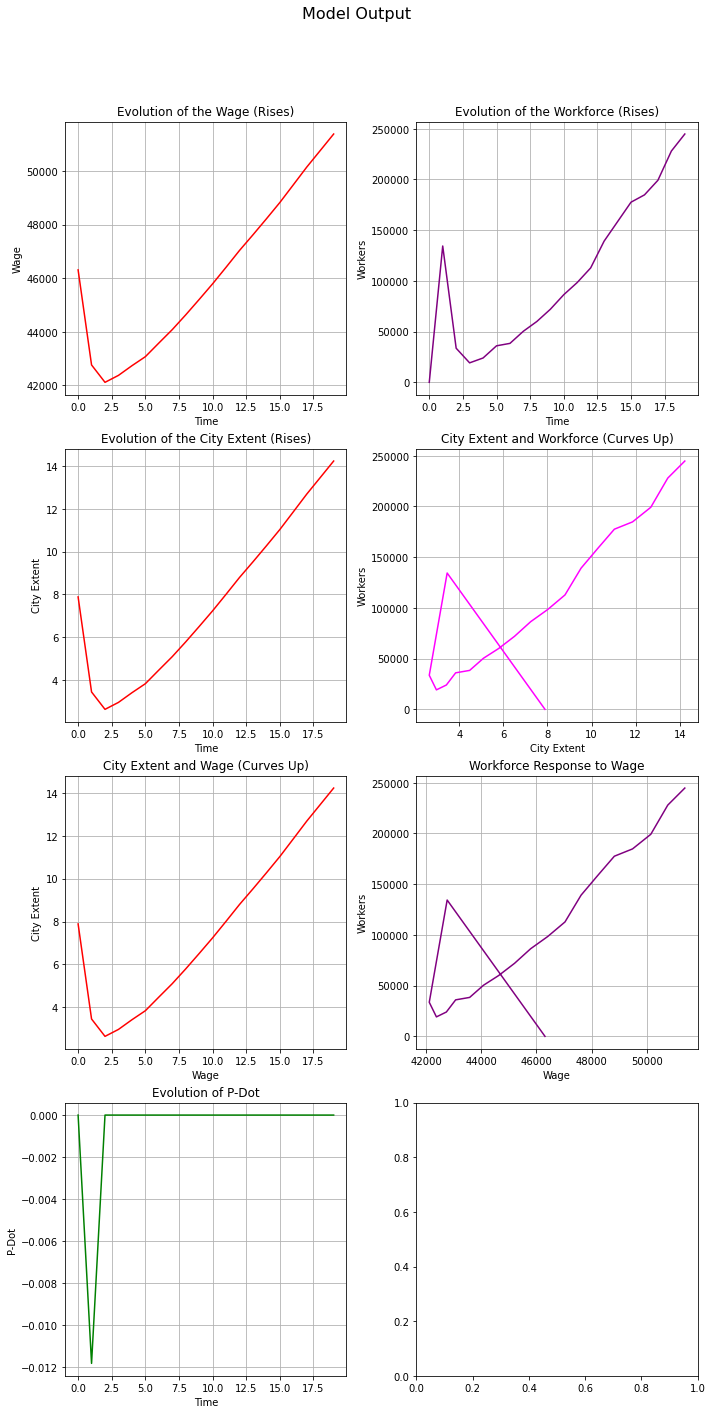

In [4]:
# Plot model output
def plot_model_data(model_out):
    workers = np.array(model_out['workers'])
    wage_premium = np.array(model_out['wage_premium'])
    wage    = np.array(model_out['wage'])
    city_extent_calc = np.array(model_out['city_extent_calc'])
    p_dot   = np.array(model_out['p_dot'])
    time    = np.arange(len(workers))

#     # Extract additional variables from model_out
#     n = np.array(model_out['n'])
#     y = np.array(model_out['y'])
#     MPL = np.array(model_out['MPL'])
#     MPK = np.array(model_out['MPK'])
#     n_target = np.array(model_out['n_target'])
#     y_target = np.array(model_out['y_target'])
#     k_target = np.array(model_out['k_target'])
#     adj_f = np.array(model_out['adj_f'])
#     F_target = np.array(model_out['F_target'])
#     F_next = np.array(model_out['F_next'])
#     N_target_total = np.array(model_out['N_target_total'])
#     F_next_total = np.array(model_out['F_next_total'])
#     F = np.array(model_out['F'])
#     k = np.array(model_out['k'])

    fig, axes = plt.subplots(4, 2, figsize=(10, 20))
    fig.suptitle('Model Output', fontsize=16)

    # Subplot 0L: Evolution of the Wage  
    axes[0, 0].plot(time, wage, color='red')
    axes[0, 0].set_title('Evolution of the Wage (Rises)')
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Wage')
    axes[0, 0].grid(True)

    # Subplot 0R: Evolution of the Workforce
    axes[0, 1].plot(time, workers, color='purple') 
    axes[0, 1].set_title('Evolution of the Workforce (Rises)')
    axes[0, 1].set_xlabel('Time')
    axes[0, 1].set_ylabel('Workers')
    axes[0, 1].grid(True)

    # Subplot 1L: Evolution of the City Extent
    axes[1,0].plot(time, city_extent_calc, color='red')
    axes[1,0].set_title('Evolution of the City Extent (Rises)')
    axes[1,0].set_xlabel('Time')
    axes[1,0].set_ylabel('City Extent')
    axes[1,0].grid(True)

    # Subplot 1R: City Extent and Workforce  
    axes[1, 1].plot(city_extent_calc, workers, color='magenta')
    axes[1, 1].set_title('City Extent and Workforce (Curves Up)')
    axes[1, 1].set_xlabel('City Extent')
    axes[1, 1].set_ylabel('Workers')
    axes[1, 1].grid(True)              
    
    # Subplot 2L: City Extent and Wage
    axes[2, 0].plot(time, city_extent_calc, color='red')
    axes[2, 0].set_title('City Extent and Wage (Curves Up)')
    axes[2, 0].set_xlabel('Wage')
    axes[2, 0].set_ylabel('City Extent')
    axes[2, 0].grid(True)

    # Subplot 2R: Workforce Response to Wage
    axes[2, 1].plot(wage, workers, color='purple')
    axes[2, 1].set_title('Workforce Response to Wage')
    axes[2, 1].set_xlabel('Wage')
    axes[2, 1].set_ylabel('Workers')
    axes[2, 1].grid(True)

    # Subplot 3L: Evolution of P_Dot
    axes[3, 0].plot(time, p_dot, color='green')
    axes[3, 0].set_title('Evolution of P-Dot')
    axes[3, 0].set_xlabel('Time')
    axes[3, 0].set_ylabel('P-Dot')
    axes[3, 0].grid(True)
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()
    
plot_model_data(model_out)

/var/folders/8x/m5kmbvj1165_088_hxrpv4740000gn/T/ipykernel_11204/583815008.py:136: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()


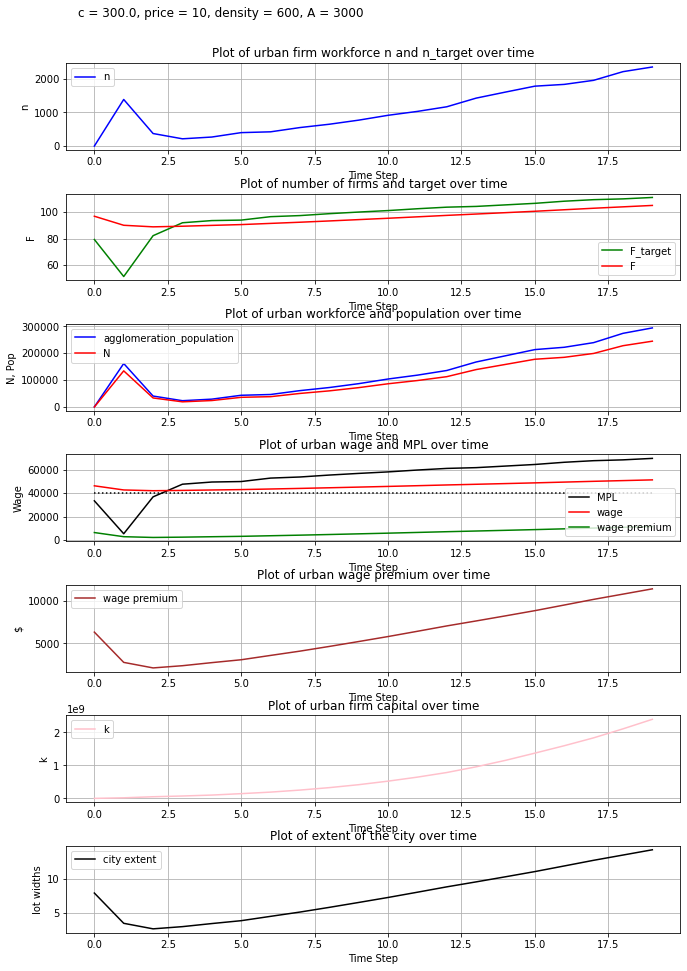

In [5]:
# Create a time array for the x-axis
time = np.arange(len(model_out['workers']))
# Create subplots with increased spacing
fig, axes = plt.subplots(7, 1, figsize=(11, 16)) # NUMBER OF PLOTS
# Adjust subplot spacing
fig.subplots_adjust(hspace=0.5)

# PRINT OUT PARAMETERS WITH PLOT
c_value = parameters['c'] #                    LIST PARAMETERS
price_of_output_value = parameters['price_of_output']
density_value = parameters['density']
A_value = parameters['A']

param_string = f'c = {c_value}, price = {price_of_output_value}, density = {density_value}, A = {A_value}'
plt.text(0.5, 0.92, param_string, transform=fig.transFigure, fontsize=12, ha='right')
 
# DESCRIBE PLOTS WANTED 
# Plot n
axes[0].plot(time, model_out['n'], label='n', color='blue')
axes[0].set_xlabel('Time Step')
axes[0].set_ylabel('n')
axes[0].set_title('Plot of urban firm workforce n and n_target over time')
axes[0].grid(True)
axes[0].legend()


# axes[0].plot(time, model_out['n_target'], label='n_target', color='red')
# axes[0].set_xlabel('Time Step')
# axes[0].set_ylabel('n_target')
# #axes[0].set_title('Plot of urban firm workforce over time')
# axes[0].grid(True)
# axes[0].legend()

# Plot F ande F_target
axes[1].plot(time, model_out['F_target'], label='F_target', color='green')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('F_target')
#axes[1].set_title('Plot of target number of firms over time')
axes[1].grid(True)
axes[1].legend()

axes[1].plot(time, model_out['F'], label='F', color='red')
axes[1].set_xlabel('Time Step')
axes[1].set_ylabel('F')
axes[1].set_title('Plot of number of firms and target over time')
axes[1].grid(True)
axes[1].legend()

# Plot N
axes[2].plot(time, model_out['agglomeration_population'], label='agglomeration_population', color='blue')
axes[2].plot(time, model_out['N'], label='N', color='red') 
axes[2].set_xlabel('Time Step')
axes[2].set_ylabel('N, Pop')
axes[2].set_title('Plot of urban workforce and population over time')
axes[2].grid(True)
axes[2].legend()

# # Plot Urban population
# axes[3].plot(time, model_out['agglomeration_population'], label='agglomeration_population', color='purple')
# axes[3].set_xlabel('Time Step')
# axes[3].set_ylabel('Agglomeration Population')
# axes[3].set_title('Plot of population over time')
# axes[3].grid(True)
# axes[3].legend()

# Plot w , MPL
axes[3].plot(time, model_out['MPL'], label='MPL', color='black')   
axes[3].plot(time, model_out['wage'], label='wage', color='red')
axes[3].plot(time, model_out['subsistence_wage'], ls = 'dotted', color='black')
axes[3].plot(time, model_out['wage_premium'], label='wage premium', color='green')
axes[3].set_xlabel('Time Step')
axes[3].set_ylabel('Wage')
axes[3].set_title('Plot of urban wage and MPL over time')
axes[3].grid(True)
axes[3].legend()


# # Plot y   ####   #3  HAD NO EFFECT
# # Y = parameters['price_of_output'] * model_out['A_F'] * (parameters['mult'] * model_out['N'] + parameters['seed_population']) ** parameters['gamma'] * model_out['k'] ** parameters['alpha_F'] * model_out['n'] ** parameters['beta_F']
# axes[4].plot(time, model_out['y'], label='firm output', color='orange')
# axes[4].set_xlabel('Time Step')
# axes[4].set_ylabel('')
# axes[4].set_title('Plot of firm output over time')
# axes[4].grid(True)
# axes[4].legend()

# Plot wage_premium    
axes[4].plot(time, model_out['wage_premium'], label='wage premium', color='brown')
axes[4].set_xlabel('Time Step')
axes[4].set_ylabel('$')
axes[4].set_title('Plot of urban wage premium over time')
axes[4].grid(True)
axes[4].legend()

# Plot k
axes[5].plot(time, model_out['k'], label='k', color='pink')
axes[5].set_xlabel('Time Step')
axes[5].set_ylabel('k')
axes[5].set_title('Plot of urban firm capital over time')
axes[5].grid(True)
axes[5].legend()

# Plot  dist
axes[6].plot(time, model_out['city_extent_calc'], label='city extent', color='black')
axes[6].set_xlabel('Time Step')
axes[6].set_ylabel('lot widths')
axes[6].set_title('Plot of extent of the city over time')
axes[6].grid(True)
axes[6].legend()

# # Plot  MPL
# axes[8].plot(time, model_out['MPL'], label='MPL', color='pink')
# axes[8].set_xlabel('Time Step')
# axes[8].set_ylabel('MPL')
# axes[8].set_title('Plot of MPL over time')
# axes[8].grid(True)
# axes[8].legend()

# # Plot MPL   ####  # 5 new  COMPLETELY MISSING!!
# axes[9].plot(time, model_out['MPL'], label='MPL', color='pink')
# #axes[9].plot(time, model_out['MPK'], label='MPK', color='blue')
# axes[9].set_xlabel('Time Step')
# axes[9].set_ylabel('MPL')
# axes[9].set_title('Plot of marginal product of labour over time')
# axes[9].grid(True)
# axes[9].legend()

# # Plot n_target  
# axes[10].plot(time, model_out['n_target'], label='MPL', color='red')
# axes[10].set_xlabel('Time Step')
# axes[10].set_ylabel('n_target')
# axes[10].set_title('Plot of n_target over time')
# axes[10].grid(True)
# axes[10].legend()

plt.tight_layout()

plt.show()

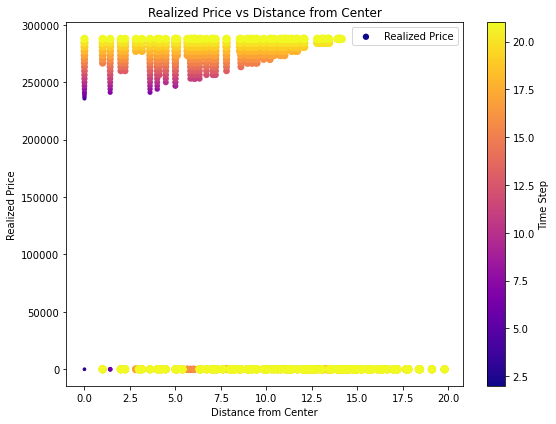

In [6]:
# Scatter shows just realized_prices not warranted price, no filters
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Filter agent_out data for Land agents
land_df = agent_out.query("agent_type == 'Land'")
land_df = land_df.dropna(axis=1, how='all').reset_index(drop=True)

# Extract the realized_price, distance_from_center, and time_step data
realized_prices = land_df['realized_price']
distance_from_center = land_df['distance_from_center']
time_steps = land_df['time_step']

# Define a colormap for different time steps
cmap = plt.get_cmap('plasma')

# Normalize time_steps to use as color and size
norm_time_steps = (time_steps - time_steps.min()) / (time_steps.max() - time_steps.min())
colors = cmap(norm_time_steps)
sizes = 10 + 60 * norm_time_steps

# Create a scatter plot for realized_price vs distance_from_center
plt.figure(figsize=(8, 6))
scatter = plt.scatter(distance_from_center, realized_prices, c=colors, s=sizes, marker='o', edgecolors='none', label='Realized Price')

# Set labels and title for the plot
plt.xlabel('Distance from Center')
plt.ylabel('Realized Price')
plt.title('Realized Price vs Distance from Center')

# Create a ScalarMappable to show color mapping in the legend
sm = ScalarMappable(cmap=cmap, norm=Normalize(vmin=time_steps.min(), vmax=time_steps.max()))
sm.set_array([])

# Add a colorbar legend
cbar = plt.colorbar(sm, label='Time Step', orientation='vertical')

# Show the legend
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


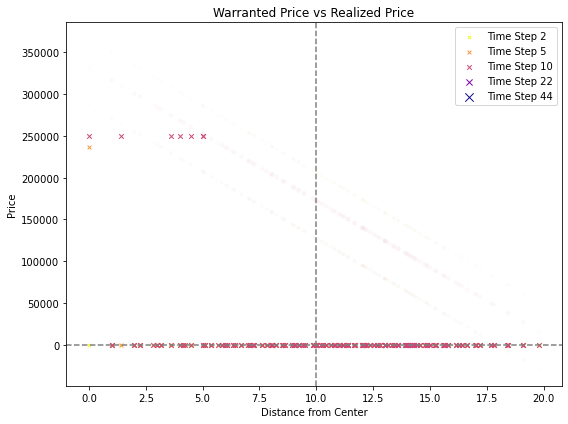

In [7]:
# Scatter plot with realized and warrented prices. Filters all but desired time steps. DOESN'T FILTER -1
# import matplotlib.pyplot as plt
# import matplotlib.cm as cm

# Filter agent_out data for Land agents
df = agent_out.query("agent_type == 'Land'")
df = df.dropna(axis=1, how='all').reset_index(drop=True)

# Define the time steps you want to display
selected_time_steps = [2,5, 10, 22, 44]

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

# Define a colormap for different time steps
# cmap = cm.get_cmap('viridis', len(selected_time_steps))
cmap = cm.get_cmap('plasma', len(selected_time_steps))

# Reverse the colormap
cmap = cmap.reversed()

# Calculate min and max dot sizes
min_dot_size = 10
max_dot_size = 70

# Create dots for the selected time steps
for i, time_step in enumerate(selected_time_steps):
    land_agents = df.query("time_step == @time_step")

    # Calculate dot size based on time step
    normalized_dot_size = (time_step - min(selected_time_steps)) / (max(selected_time_steps) - min(selected_time_steps))
    dot_size = min_dot_size + (max_dot_size - min_dot_size) * normalized_dot_size

    # Define the color based on the colormap
    color = cmap(i)

    # Create scatter plot for distance from center vs warranted_price with light-colored dots
    ax.scatter(land_agents['distance_from_center'], land_agents['warranted_price'], alpha=0.01, s=dot_size, c=color, marker='o', edgecolors='none')

    # Add darker 'x' markers for realized_price
    ax.scatter(land_agents['distance_from_center'], land_agents['realized_price'], label=f'Time Step {time_step}', alpha=0.99, s=dot_size, c=color, marker='x', linewidths=1)

# Set labels and title for the plot
ax.set_xlabel('Distance from Center')
ax.set_ylabel('Price')
ax.set_title('Warranted Price vs Realized Price')

# Add horizontal and vertical reference lines
ax.axhline(y=0, color='grey', linestyle='--', label='_nolegend_')  # No legend entry for the reference lines
ax.axvline(x=10, color='grey', linestyle='--', label='_nolegend_')

# Show the legend
ax.legend()

plt.tight_layout()

plt.show()


In [8]:
# # Scatter plot with realized and warrented prices. FILTERING -1 values and all but required time steps

# # Filter agent_out data for Land agents
# df = agent_out.query("agent_type == 'Land'")
# df = df.dropna(axis=1, how='all').reset_index(drop=True)

# # Create a separate dataset with filtered realized_price
# filtered_realized_price = df[df['realized_price'] != -1]

# # Define the time steps you want to display
# selected_time_steps = [2, 5, 10, 22, 44]

# # Create a scatter plot for filtered realized_price
# fig, ax = plt.subplots(figsize=(8, 6))

# # Define a colormap for different time steps
# cmap = cm.get_cmap('plasma', len(selected_time_steps))

# # Reverse the colormap
# cmap = cmap.reversed()

# # Calculate min and max dot sizes
# min_dot_size = 10
# max_dot_size = 70

# # Create dots for the selected time steps
# for i, time_step in enumerate(selected_time_steps):
#     land_agents = df.query("time_step == @time_step")

#     # Calculate dot size based on time step
#     normalized_dot_size = (time_step - min(selected_time_steps)) / (max(selected_time_steps) - min(selected_time_steps))
#     dot_size = min_dot_size + (max_dot_size - min_dot_size) * normalized_dot_size

#     # Define the color based on the colormap
#     color = cmap(i)

#     # Create scatter plot for distance from center vs warranted_price with light-colored dots
#     ax.scatter(land_agents['distance_from_center'], land_agents['warranted_price'], alpha=0.01, s=dot_size, c=color, marker='o', edgecolors='none')

#     # Create a separate dataset with filtered realized_price for the selected time steps
#     filtered_realized_price_time_step = filtered_realized_price.query("time_step == @time_step")

#     # Create scatter plot for filtered realized_price with darker 'x' markers
#     ax.scatter(filtered_realized_price_time_step['distance_from_center'], filtered_realized_price_time_step['realized_price'], alpha=0.99, s=dot_size, c=color, marker='x', linewidths=1, label=f'Time Step {time_step}')

# # Set labels and title for the plot
# ax.set_xlabel('Distance from Center')
# ax.set_ylabel('Price')
# ax.set_title('Warranted Price vs Filtered Realized Price')

# # Add horizontal and vertical reference lines
# ax.axhline(y=0, color='grey', linestyle='--', label='_nolegend_')  # No legend entry for the reference lines
# ax.axvline(x=10, color='grey', linestyle='--', label='_nolegend_')

# # Show the legend
# ax.legend()

# plt.tight_layout()

# plt.show()


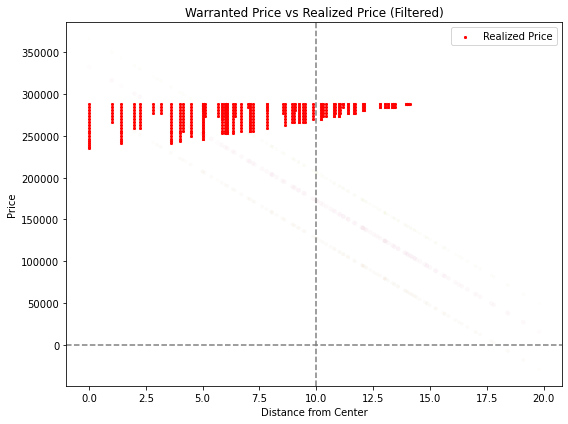

In [9]:
# Scatter plot shows all values for realized price, and a few timesteps for warranted price. FILTERS -1

# Filter agent_out data for Land agents
df = agent_out.query("agent_type == 'Land'")
df = df.dropna(axis=1, how='all').reset_index(drop=True)

# Create a separate dataset with filtered realized_price
filtered_realized_price = df[df['realized_price'] != -1]

# Define the time steps you want to display
selected_time_steps = [2, 5, 10, 22, 44]

# Create a scatter plot for filtered realized_price and separate dataset for every realized_price
fig, ax = plt.subplots(figsize=(8, 6))

# Define a colormap for different time steps
cmap = cm.get_cmap('plasma', len(selected_time_steps))

# Reverse the colormap
cmap = cmap.reversed()

# Calculate min and max dot sizes
min_dot_size = 10
max_dot_size = 70

# Create scatter plot for distance from center vs filtered warranted_price with light-colored dots
for i, time_step in enumerate(selected_time_steps):
    land_agents = df.query("time_step == @time_step")

    # Calculate dot size based on time step
    normalized_dot_size = (time_step - min(selected_time_steps)) / (max(selected_time_steps) - min(selected_time_steps))
    dot_size = min_dot_size + (max_dot_size - min_dot_size) * normalized_dot_size

    # Define the color based on the colormap
    color = cmap(i)

    # Create scatter plot for distance from center vs warranted_price with light-colored dots
    ax.scatter(land_agents['distance_from_center'], land_agents['warranted_price'], alpha=0.01, s=dot_size, c=color, marker='o', edgecolors='none')

# Create a separate dataset with every realized_price (except -1)
realized_price_data = df[df['realized_price'] != -1]

# Create scatter plot for every realized_price
ax.scatter(realized_price_data['distance_from_center'], realized_price_data['realized_price'], alpha=0.99, s=5, c='red', marker='x', label='Realized Price')

# Set labels and title for the plot
ax.set_xlabel('Distance from Center')
ax.set_ylabel('Price')
ax.set_title('Warranted Price vs Realized Price (Filtered)')

# Add horizontal and vertical reference lines
ax.axhline(y=0, color='grey', linestyle='--', label='_nolegend_')  # No legend entry for the reference lines
ax.axvline(x=10, color='grey', linestyle='--', label='_nolegend_')

# Show the legend
ax.legend()

plt.tight_layout()
plt.show()


In [10]:
# # Origional scatter? - warranted and realized price. Plot price vs distance at initilal, middle, and final time step
# # Filter agent_out data for Land agents
# df = agent_out.query("agent_type == 'Land'")
# df = df.dropna(axis=1, how='all').reset_index(drop=True)
# df = df.reset_index(drop=True)

# # Get the range of time steps
# time_steps = df['time_step'].unique()
# middle_time_step = time_steps[len(time_steps) // 2]

# # Calculate min and max dot sizes
# min_dot_size = 10
# max_dot_size = 70

# # Create a scatter plot with three dots
# fig, axs = plt.subplots(1, 2, figsize=(16, 6))  # Create two subplots side by side

# for ax_index, ax in enumerate(axs):
#     # Create dots for the three selected time steps
#     for i, time_step in enumerate([time_steps[0], middle_time_step, time_steps[-1]]):
#         land_agents = df.query("time_step == @time_step")

#         # Calculate dot size based on time step
#         normalized_dot_size = (time_step - min(time_steps)) / (max(time_steps) - min(time_steps))
#         dot_size = min_dot_size + (max_dot_size - min_dot_size) * normalized_dot_size

#         # Determine which variable to plot based on subplot index
#         if ax_index == 0:
#             y_variable = 'warranted_price'
#         else:
#             y_variable = 'warranted_rent'

#         # Create scatter plot for distance from center vs warranted_price or warranted_rent
#         ax.scatter(land_agents['distance_from_center'], land_agents[y_variable], label=f'Time Step {time_step}', alpha=0.7, s=dot_size)

#     # Set labels and title for each subplot
#     ax.set_xlabel('Distance from Center')
#     ax.set_ylabel(y_variable.replace('_', ' ').title())  # Format ylabel
#     ax.set_title(f'Distance vs {y_variable.replace("_", " ").title()} - Plot {ax_index + 1}')
#     ax.legend()

# plt.tight_layout()
                 
# # Add horizontal and vertical reference lines
# plt.axhline(y = 0, xmin = 0., color ='black')# zero 
# plt.axvline(x = 10, ymin = 0., color ='red')
# plt.text(2, 6, r'zero rent', fontsize=15)

# plt.show()

In [11]:
# # Plot all model_out variables
# def plot_all_model_out_keys(model_out):
#     time = np.arange(len(model_out['workers']))

#     # Set up the figure with subplots
#     num_keys = len(model_out.keys())
#     num_cols = 5  # Number of columns in the grid
#     num_rows = (num_keys + num_cols - 1) // num_cols  # Calculate the number of rows needed
#     fig, axes = plt.subplots(num_rows, num_cols, figsize=(21, 4 * num_rows))
#     fig.suptitle('Model Output', fontsize=16)

#     # Plot each model_out key
#     model_out_keys = list(model_out.keys())
#     for i, ax in enumerate(axes.ravel()):
#         if i < len(model_out_keys):
#             model_out_key = model_out_keys[i]
#             variable = np.array(model_out[model_out_key])
#             ax.plot(time, variable, color='blue')
#             ax.set_xlabel('Time')
#             ax.set_ylabel(model_out_key)
#             ax.grid(True)

#     plt.tight_layout()
#     plt.subplots_adjust(top=0.9)
#     plt.show()
# plot_all_model_out_keys(model_out)

In [12]:
# Set variables for heatmaps

# Filter agent_out data for Person agents
person_df = agent_out.query("agent_type == 'Person'")
person_df = person_df.dropna(axis=1, how='all').reset_index(drop=True)
person_df = person_df.reset_index(drop=True)

# TODO: get model time_steps instead
# time_steps =
# Filter agent_out data for Land agents
land_df = agent_out.query("agent_type == 'Land'")
land_df = land_df.dropna(axis=1, how='all').reset_index(drop=True)
land_df = land_df.reset_index(drop=True)

# Get the range of time steps
person_time_steps = person_df['time_step'].unique()
num_person_time_steps = len(person_time_steps)
person_middle_time_step = person_time_steps[num_person_time_steps // 2]

# Define the time steps and number of time steps to plot
time_steps_to_plot = 5

# Get unique time steps from the person_df
person_time_steps = person_df['time_step'].unique()
num_person_time_steps = len(person_time_steps)

# Calculate the time step intervals
time_step_interval = max(1, num_person_time_steps // (time_steps_to_plot - 1))


In [13]:
# Heatmap grid fast, plotly - 5 plots 5 data

# Define the names for each row
row_names = ['Is Working', 'Warranted Price', 'Realized Price', 'Owner']

# Create subplots with Plotly
fig = sp.make_subplots(rows=4, cols=time_steps_to_plot, shared_yaxes=True)

# Define a custom color scale for the heatmap
color_scale = [[0, 'blue'], [1, 'red']]

# Create a list to store the titles for the columns
column_titles = []

# Set a fixed height for each row
row_height = 0.2  # You can adjust the height as needed

for i in range(time_steps_to_plot):
    time_step_index = min(i * time_step_interval, num_person_time_steps - 1)
    time_step = person_time_steps[time_step_index]
    person_agents = person_df.query("time_step == @time_step")
    land_agents = land_df.query("time_step == @time_step")

    # Calculate the number of rows and columns for each subplot
    num_rows, num_cols = 2, 3  # You can adjust these values to your preference

    # Create y-axis titles for the first plot in each row
    y_titles = [row_names[j] if j == 0 else '' for j in range(4)]

    # Create an Is Working Heatmap with square aspect ratio and a colorbar
    heatmap1 = go.Heatmap(
        x=person_agents['x'],
        y=person_agents['y'],
        z=person_agents['is_working'],
        colorscale=color_scale,
        colorbar=dict(title='Is Working'),
        showlegend=(i == 0)  # Show legend for the first plot in each row
    )
    fig.add_trace(heatmap1, row=1, col=i+1)

    # Create a Warranted Price Heatmap with square aspect ratio and a colorbar
    heatmap2 = go.Heatmap(
        x=land_agents['x'],
        y=land_agents['y'],
        z=land_agents['warranted_price'],
        colorscale='Viridis',
        colorbar=dict(title='Warranted Price'),
        showlegend=(i == 0)  # Show legend for the first plot in each row
    )
    fig.add_trace(heatmap2, row=2, col=i+1)

    # Create a Realized Price Heatmap with square aspect ratio and a colorbar
    heatmap3 = go.Heatmap(
        x=land_agents['x'],
        y=land_agents['y'],
        z=land_agents['realized_price'],
        colorscale='Viridis',
        colorbar=dict(title='Realized Price'),
        showlegend=(i == 0)  # Show legend for the first plot in each row
    )
    fig.add_trace(heatmap3, row=3, col=i+1)

    # Create an Owner Heatmap with square aspect ratio and a colorbar
    heatmap4 = go.Heatmap(
        x=land_agents['x'],
        y=land_agents['y'],
        z=land_agents['person_vs_investor_owner'],
        colorscale=color_scale,
        colorbar=dict(title='Owner'),
        showlegend=(i == 0)  # Show legend for the first plot in the last row
    )
    fig.add_trace(heatmap4, row=4, col=i+1)

    # Add the time step as a column title
    column_titles.append(f'Time Step {time_step}')

# Update the layout to set y-axis titles
for j, title in enumerate(row_names):
    fig.update_yaxes(title_text=title, row=j+1, col=1)

# Update the layout to set column titles
fig.update_layout(
    title_text="Visualizations with Plotly",
    width=1000,
    height=1000,  # Adjust the height as needed
    title_x=0.5,  # Center the title
    title_y=0.97,  # Adjust the title position
)

for i, title in enumerate(column_titles):
    fig.update_xaxes(title_text=title, row=4, col=i+1)

fig.show()


In [14]:
# # WRONG DATA PLOTTED, but keep since aspect ratio is actually square - to fix above. Heatmap grid fast, plotly, square

# # Define the names for each row
# row_names = ['Is Working', 'Warranted Price', 'Scatter Plot', 'Realized Price', 'Is Working']

# # Create subplots with Plotly
# fig = sp.make_subplots(rows=5, cols=time_steps_to_plot, shared_yaxes=True)

# # Define a custom color scale for the heatmap
# color_scale = [[0, 'blue'], [1, 'red']]

# # Create a list to store the titles for the columns
# column_titles = []

# # Set a fixed height for each row
# row_height = 0.2  # You can adjust the height as needed

# for i in range(time_steps_to_plot):
#     time_step_index = min(i * time_step_interval, num_person_time_steps - 1)
#     time_step = person_time_steps[time_step_index]
#     person_agents = person_df.query("time_step == @time_step")
#     land_agents = land_df.query("time_step == @time_step")

#     # Calculate the number of rows and columns for each subplot
#     num_rows, num_cols = 2, 3  # You can adjust these values to your preference

#     # Create y-axis titles for the first plot in each row
#     y_titles = [row_names[j] if j == 0 else '' for j in range(5)]

#     # Create an Is Working Heatmap with square aspect ratio and a colorbar
#     heatmap1 = go.Heatmap(
#         x=person_agents['x'],
#         y=person_agents['y'],
#         z=person_agents['is_working'],
#         colorscale=color_scale,
#         colorbar=dict(title='Is Working'),
#         showlegend=(i == 0)  # Show legend for the first plot in each row
#     )
#     fig.add_trace(heatmap1, row=1, col=i+1)

#     # Create a Warranted Price Heatmap with square aspect ratio and a colorbar
#     heatmap2 = go.Heatmap(
#         x=land_agents['x'],
#         y=land_agents['y'],
#         z=land_agents['warranted_price'],
#         colorscale='Viridis',
#         colorbar=dict(title='Warranted Price'),
#         showlegend=(i == 0)  # Show legend for the first plot in each row
#     )
#     fig.add_trace(heatmap2, row=2, col=i+1)

#     # Create a Scatter Plot
#     scatter = px.scatter(land_agents, x='distance_from_center', y='warranted_price',
#                          title=f'Scatter Plot (Time Step {time_step})')
#     fig.add_trace(scatter['data'][0], row=3, col=i+1)

#     # Create a Realized Price Heatmap with square aspect ratio and a colorbar
#     heatmap3 = go.Heatmap(
#         x=land_agents['x'],
#         y=land_agents['y'],
#         z=land_agents['realized_price'],
#         colorscale='Viridis',
#         colorbar=dict(title='Realized Price'),
#         showlegend=(i == 0)  # Show legend for the first plot in each row
#     )
#     fig.add_trace(heatmap3, row=4, col=i+1)

#     # Create a second Is Working Heatmap (Version 2) with square aspect ratio and a colorbar
#     heatmap4 = go.Heatmap(
#         x=person_agents['x'],
#         y=person_agents['y'],
#         z=person_agents['is_working'],
#         colorscale=color_scale,
#         colorbar=dict(title='Is Working'),
#         showlegend=(i == 0)  # Show legend for the first plot in each row
#     )
#     fig.add_trace(heatmap4, row=5, col=i+1)

#     # Add the time step as a column title
#     column_titles.append(f'Time Step {time_step}')

# # Update the layout to set y-axis titles
# for j, title in enumerate(row_names):
#     fig.update_yaxes(title_text=title, row=j+1, col=1)

# # Update the layout to set column titles
# fig.update_layout(
#     title_text="Visualizations with Plotly",
#     width=1000,
#     height=1000,  # Adjust the height as needed
#     title_x=0.5,  # Center the title
#     title_y=0.97,  # Adjust the title position
# )

# for i, title in enumerate(column_titles):
#     fig.update_xaxes(title_text=title, row=5, col=i+1)

# fig.show()


In [15]:
# # Matplotlib three heatmaps

# # Create subplots with 3 rows and 3 columns
# fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# # Iterate over the subplots and time steps for Person data
# for i, time_step in enumerate([person_time_steps[0], person_middle_time_step, person_time_steps[-1]]):
#     person_agents = person_df.query("time_step == @time_step")
    
#     # Create a grid to represent the space
#     grid_size = (person_df['x'].max() + 1, person_df['y'].max() + 1)
#     heatmap = np.zeros(grid_size)
    
#     # Fill the heatmap with the 'is_working' values
#     for index, row in person_agents.iterrows():
#         x = int(row['x'])
#         y = int(row['y'])
#         is_working = row['is_working']
#         heatmap[x, y] = is_working
    
#     # Display the heatmap in the current subplot
#     im = axs[0, i].imshow(heatmap, cmap='coolwarm', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]], vmin=0, vmax=1)
#     axs[0, i].set_title(f'Person Time Step {time_step}')
#     axs[0, i].set_xlabel('X')
#     axs[0, i].set_ylabel('Y')
#     axs[0, i].grid(False)

# # Iterate over the subplots and time steps for Land data
# for i, time_step in enumerate([person_time_steps[0], person_middle_time_step, person_time_steps[-1]]):
#     land_agents = land_df.query("time_step == @time_step")
    
#     # Create a grid to represent the space
#     grid_size = (land_df['x'].max() + 1, land_df['y'].max() + 1)
#     heatmap = np.zeros(grid_size)
    
#     # Fill the heatmap with the values
#     for index, row in land_agents.iterrows():
#         x = int(row['x'])
#         y = int(row['y'])
#         price = row['warranted_price']
#         heatmap[x, y] = price
    
#     # Display the heatmap in the current subplot
#     im = axs[1, i].imshow(heatmap, cmap='viridis', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]]) #, vmin=min_price, vmax=max_price)
#     axs[1, i].grid(False)
    
#     # Create scatter plot for distance from center vs warranted price
#     scatter = axs[2, i].scatter(land_agents['distance_from_center'], land_agents['warranted_price'], c='blue', alpha=0.5)
#     axs[2, i].set_title(f'Distance vs Warranted Price at Time Step {time_step}')
#     axs[2, i].set_xlabel('Distance from Center')
#     axs[2, i].set_ylabel('Warranted Price')
#     axs[2, i].grid(True)
    
#     # Set same min and max values for scatter plots
#     # axs[2, i].set_ylim(min_price, max_price)

# # Add a common colorbar
# divider = make_axes_locatable(axs[1, 2])
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cbar = plt.colorbar(im, cax=cax, ticks=[0, 1])
# cbar.set_label('Is Working')

# plt.tight_layout()
# plt.show()

NEXT - SHOW BIDDING MARKET  EFFECTS - RECORD IS IT FOR SALE, RECORD PRICE, TYPE  OF OWNERSHIP

Great! Now add 2 additional rows of heatmaps. 1.  showing whether the owner is a person or a bank (row['person_vs_investor_owner']) instead of whether they are working or the warranted_price and 2. another showing what the realized_price is row['realized_price']

In [16]:
# # Matplotlib 5 heatmaps - slower 5.6s was MAIN has another line for realized price - works

# # Calculate the number of evenly spaced time steps
# time_steps_to_plot = 5

# # Get the range of time steps for Person data
# person_time_steps = person_df['time_step'].unique()
# num_person_time_steps = len(person_time_steps)

# # Calculate the time step intervals
# time_step_interval = max(1, num_person_time_steps // (time_steps_to_plot - 1))

# # Create subplots with 4 rows and time_steps_to_plot columns
# fig, axs = plt.subplots(4, time_steps_to_plot, figsize=(15, 15))

# # Row titles
# row_titles = ['Is Working Heatmap', 'Warranted Price Heatmap', 'Scatter Plots', 'Realized Price Heatmap']

# # Iterate over rows and columns
# for row_index in range(4):
#     for col_index in range(time_steps_to_plot):
#         if col_index == 0:
#             axs[row_index, col_index].set_title(row_titles[row_index])  # Set row title for the first subplot in each row
#         else:
#             axs[row_index, col_index].set_title("")  # Set an empty title for other subplots in the same row

# # Iterate over the subplots and evenly spaced time steps for Person data
# for i in range(time_steps_to_plot):
#     time_step_index = min(i * time_step_interval, num_person_time_steps - 1)
#     time_step = person_time_steps[time_step_index]
#     person_agents = person_df.query("time_step == @time_step")
    
#     # Create a grid to represent the space
#     grid_size = (person_df['x'].max() + 1, person_df['y'].max() + 1)
#     heatmap = np.zeros(grid_size)
    
#     # Fill the heatmap with the 'is_working' values
#     for index, row in person_agents.iterrows():
#         x = int(row['x'])
#         y = int(row['y'])
#         is_working = row['is_working']
#         heatmap[x, y] = is_working
    
#     # Display the 'is_working' heatmap in the current subplot
#     row_index = 0
#     col_index = i
#     im = axs[row_index, col_index].imshow(heatmap, cmap='coolwarm', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]], vmin=0, vmax=1)
#     axs[row_index, col_index].set_xlabel('X')
#     axs[row_index, col_index].set_ylabel('Y')
#     axs[row_index, col_index].grid(False)

# # Iterate over the subplots and evenly spaced time steps for Land data
# for i in range(time_steps_to_plot):
#     time_step_index = min(i * time_step_interval, num_person_time_steps - 1)
#     time_step = person_time_steps[time_step_index]
#     land_agents = land_df.query("time_step == @time_step")
    
#     # Create a grid to represent the space
#     grid_size = (land_df['x'].max() + 1, land_df['y'].max() + 1)
#     heatmap = np.zeros(grid_size)
    
#     # Fill the heatmap with the 'warranted_price' values
#     for index, row in land_agents.iterrows():
#         x = int(row['x'])
#         y = int(row['y'])
#         price = row['warranted_price']
#         heatmap[x, y] = price
    
#     # Display the 'warranted_price' heatmap in the current subplot
#     row_index = 1
#     col_index = i
#     im = axs[row_index, col_index].imshow(heatmap, cmap='viridis', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]])
#     axs[row_index, col_index].grid(False)

# # Create a row of 5 scatter plots
# for i in range(time_steps_to_plot):
#     time_step_index = min(i * time_step_interval, num_person_time_steps - 1)
#     time_step = person_time_steps[time_step_index]
#     land_agents = land_df.query("time_step == @time_step")
    
#     row_index = 2
#     col_index = i
    
#     # Create scatter plot for distance from center vs warranted price
#     scatter = axs[row_index, col_index].scatter(land_agents['distance_from_center'], land_agents['warranted_price'], c='blue', alpha=0.5)
#     axs[row_index, col_index].set_xlabel('Distance from Center')
#     axs[row_index, col_index].set_ylabel('Warranted Price')
#     axs[row_index, col_index].grid(True)

# # Iterate over the subplots and evenly spaced time steps for Land data
# for i in range(time_steps_to_plot):
#     time_step_index = min(i * time_step_interval, num_person_time_steps - 1)
#     time_step = person_time_steps[time_step_index]
#     land_agents = land_df.query("time_step == @time_step")
    
#     # Create a grid to represent the space
#     grid_size = (land_df['x'].max() + 1, land_df['y'].max() + 1)
#     heatmap = np.zeros(grid_size)
    
#     # Fill the heatmap with the 'realized_price' values
#     for index, row in land_agents.iterrows():
#         x = int(row['x'])
#         y = int(row['y'])
#         price = row['realized_price']
#         heatmap[x, y] = price
    
#     # Display the 'realized_price' heatmap in the current subplot
#     row_index = 3
#     col_index = i
#     im = axs[row_index, col_index].imshow(heatmap, cmap='viridis', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]])
#     axs[row_index, col_index].grid(False)

# # Add a common colorbar
# divider = make_axes_locatable(axs[1, time_steps_to_plot - 1])
# cax = divider.append_axes("right", size="5%", pad=0.1)
# cbar = plt.colorbar(im, cax=cax, ticks=[0, 1])
# cbar.set_label('Is Working / Warranted Price / Realized Price')

# plt.tight_layout()
# plt.show()


In [17]:
# # Small rectangle heatmap grid fast, plotly

# # Define the time steps and number of time steps to plot
# time_steps_to_plot = 5

# # Get unique time steps from the person_df
# person_time_steps = person_df['time_step'].unique()
# num_person_time_steps = len(person_time_steps)

# # Calculate the time step intervals
# time_step_interval = max(1, num_person_time_steps // (time_steps_to_plot - 1))

# # Create subplots with Plotly
# fig = sp.make_subplots(rows=5, cols=time_steps_to_plot, subplot_titles=[
#     'Is Working Heatmap', 'Warranted Price Heatmap', 'Scatter Plots',
#     'Realized Price Heatmap', 'Is Working Heatmap (Version 2)'
# ])

# # Define a custom color scale for the heatmap
# color_scale = [[0, 'blue'], [1, 'red']]

# for i in range(time_steps_to_plot):
#     time_step_index = min(i * time_step_interval, num_person_time_steps - 1)
#     time_step = person_time_steps[time_step_index]
#     person_agents = person_df.query("time_step == @time_step")
#     land_agents = land_df.query("time_step == @time_step")

#     # Create an Is Working Heatmap
#     fig.add_trace(go.Heatmap(
#         z=person_agents.pivot('x', 'y', 'is_working').values,
#         colorscale=color_scale,
#         colorbar=dict(title='Is Working'),
#     ), row=1, col=i+1)

#     # Create a Warranted Price Heatmap
#     fig.add_trace(go.Heatmap(
#         z=land_agents.pivot('x', 'y', 'warranted_price').values,
#         colorscale='Viridis',
#         colorbar=dict(title='Warranted Price'),
#     ), row=2, col=i+1)

#     # Create a Scatter Plot
#     scatter = px.scatter(land_agents, x='distance_from_center', y='warranted_price',
#                          title=f'Scatter Plot (Time Step {time_step})')
#     fig.add_trace(scatter['data'][0], row=3, col=i+1)

#     # Create a Realized Price Heatmap
#     fig.add_trace(go.Heatmap(
#         z=land_agents.pivot('x', 'y', 'realized_price').values,
#         colorscale='Viridis',
#         colorbar=dict(title='Realized Price'),
#     ), row=4, col=i+1)

#     # Create a second Is Working Heatmap (Version 2)
#     fig.add_trace(go.Heatmap(
#         z=person_agents.pivot('x', 'y', 'is_working').values,
#         colorscale=color_scale,
#         colorbar=dict(title='Is Working'),
#     ), row=5, col=i+1)

# fig.update_layout(title_text="Visualizations with Plotly")
# fig.show()


In [18]:
# # Fixed labels - Heatmap grid fast, plotly, square

# # Define the names for each row
# row_names = ['Is Working', 'Warranted Price', 'Scatter Plot', 'Realized Price', 'Is Working']

# # Create subplots with Plotly and set square aspect ratio
# fig = sp.make_subplots(rows=5, cols=time_steps_to_plot, shared_yaxes=True, row_heights=row_heights)

# # Define a custom color scale for the heatmap
# color_scale = [[0, 'blue'], [1, 'red']]

# # Create a list to store the titles for the columns
# column_titles = []

# for i in range(time_steps_to_plot):
#     time_step_index = min(i * time_step_interval, num_person_time_steps - 1)
#     time_step = person_time_steps[time_step_index]
#     person_agents = person_df.query("time_step == @time_step")
#     land_agents = land_df.query("time_step == @time_step")

#     # Calculate the number of rows and columns for each subplot
#     num_rows, num_cols = 2, 3  # You can adjust these values to your preference

#     # Create y-axis titles for the first plot in each row
#     y_titles = [row_names[j] if j == 0 else '' for j in range(5)]

#     # Create an Is Working Heatmap with square aspect ratio
#     heatmap1 = go.Heatmap(
#         x=person_agents['x'],
#         y=person_agents['y'],
#         z=person_agents['is_working'],
#         colorscale=color_scale,
#         colorbar=dict(title='Is Working')
#     )
#     fig.add_trace(heatmap1, row=1, col=i+1)

#     # Create a Warranted Price Heatmap with square aspect ratio
#     heatmap2 = go.Heatmap(
#         x=land_agents['x'],
#         y=land_agents['y'],
#         z=land_agents['warranted_price'],
#         colorscale='Viridis',
#         colorbar=dict(title='Warranted Price')
#     )
#     fig.add_trace(heatmap2, row=2, col=i+1)

#     # Create a Scatter Plot
#     scatter = px.scatter(land_agents, x='distance_from_center', y='warranted_price',
#                          title=f'Scatter Plot (Time Step {time_step})')
#     fig.add_trace(scatter['data'][0], row=3, col=i+1)

#     # Create a Realized Price Heatmap with square aspect ratio
#     heatmap3 = go.Heatmap(
#         x=land_agents['x'],
#         y=land_agents['y'],
#         z=land_agents['realized_price'],
#         colorscale='Viridis',
#         colorbar=dict(title='Realized Price')
#     )
#     fig.add_trace(heatmap3, row=4, col=i+1)

#     # Create a second Is Working Heatmap (Version 2) with square aspect ratio
#     heatmap4 = go.Heatmap(
#         x=person_agents['x'],
#         y=person_agents['y'],
#         z=person_agents['is_working'],
#         colorscale=color_scale,
#         colorbar=dict(title='Is Working')
#     )
#     fig.add_trace(heatmap4, row=5, col=i+1)

#     # Add the time step as a column title
#     column_titles.append(f'Time Step {time_step}')

# # Update the layout to set y-axis titles
# for j, title in enumerate(row_names):
#     fig.update_yaxes(title_text=title, row=j+1, col=1)

# # Update the layout to set column titles
# fig.update_layout(
#     title_text="Visualizations with Plotly",
#     width=1000,
#     height=1000,  # Adjust the height as needed
#     title_x=0.5,  # Center the title
#     title_y=0.97,  # Adjust the title position
# )

# for i, title in enumerate(column_titles):
#     fig.update_xaxes(title_text=title, row=5, col=i+1)

# fig.show()


In [19]:
# # Slider for 1 heatmap for is_working

# # Define a function to display the is_working heatmap at a specific timestep
# def plot_is_working_heatmap(timestep=0):
#     plt.figure(figsize=(8, 6))
#     time_step = person_time_steps[timestep]
#     person_agents = person_df.query("time_step == @time_step")
    
#     grid_size = (person_df['x'].max() + 1, person_df['y'].max() + 1)
#     heatmap = np.zeros(grid_size)
    
#     for index, row in person_agents.iterrows():
#         x = int(row['x'])
#         y = int(row['y'])
#         is_working = row['is_working']
#         heatmap[x, y] = is_working
    
#     plt.imshow(heatmap, cmap='coolwarm', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]], vmin=0, vmax=1)
#     plt.title(f'Is Working Heatmap (Timestep: {time_step})')
#     plt.xlabel('X')
#     plt.ylabel('Y')
#     plt.grid(False)
#     plt.colorbar()
#     plt.show()

# # Create a slider widget for controlling the timestep
# timestep_slider = widgets.IntSlider(
#     value=0,
#     min=0,
#     max=len(person_time_steps) - 1,
#     step=1,
#     description='Timestep:'
# )

# # Create an interactive heatmap using the interactive function
# interactive_heatmap = widgets.interactive(plot_is_working_heatmap, timestep=timestep_slider)

# # Display the interactive heatmap
# display(interactive_heatmap)


In [20]:
# Slider for 2 heatmaps for is_working and warranted_price

# Define a function to display the is_working heatmap at a specific timestep
def plot_heatmaps(timestep=0):
    plt.figure(figsize=(15, 15))
    
    # Iterate over rows and plot each heatmap
    for row_index, (title, data) in enumerate(zip(row_titles, data_for_heatmaps)):
        plt.subplot(3, 1, row_index + 1)
        time_step = person_time_steps[timestep]
        
        if data is not None:
            agents = data.query("time_step == @time_step")
        
            grid_size = (data['x'].max() + 1, data['y'].max() + 1)
            heatmap = np.zeros(grid_size)
            
            if title == 'Is Working Heatmap':
                # Fill the heatmap with the 'is_working' values
                for index, row in agents.iterrows():
                    x = int(row['x'])
                    y = int(row['y'])
                    value = row['is_working']
                    heatmap[x, y] = value
            elif title == 'Warranted Price Heatmap':
                # Fill the heatmap with the 'warranted_price' values
                for index, row in agents.iterrows():
                    x = int(row['x'])
                    y = int(row['y'])
                    value = row['warranted_price']
                    heatmap[x, y] = value
        
            plt.imshow(heatmap, cmap='coolwarm' if title == 'Is Working Heatmap' else 'viridis', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]], vmin=0 if title == 'Is Working Heatmap' else None)
            plt.title(f'{title} (Timestep: {time_step})')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.grid(False)
            plt.colorbar()
        else:
            if title == 'Scatter Plots':
                # Create scatter plot for distance from center vs warranted price
                plt.text(0.5, 0.5, 'Scatter Plots (No Data)', horizontalalignment='center', verticalalignment='center', fontsize=12)
                plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Row titles and data for heatmaps
row_titles = ['Is Working Heatmap', 'Warranted Price Heatmap', 'Scatter Plots']
data_for_heatmaps = [person_df, land_df, None]  # None for Scatter Plots

# Create a slider widget for controlling the timestep
timestep_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(person_time_steps) - 1,
    step=1,
    description='Timestep:'
)

# Create an interactive function using the widgets
interactive_heatmaps = widgets.interactive(plot_heatmaps, timestep=timestep_slider)

# Display the interactive function
display(interactive_heatmaps)


interactive(children=(IntSlider(value=0, description='Timestep:', max=19), Output()), _dom_classes=('widget-in…

In [21]:
# Slider heatmap for realized price

# Compute the minimum and maximum realized_price values over all time steps
min_realized_price = land_df['realized_price'].min()
max_realized_price = land_df['realized_price'].max()

# Define a function to display the realized_price heatmap at a specific timestep
def plot_realized_price_heatmap(timestep=0):
    plt.figure(figsize=(8, 6))
    time_step = person_time_steps[timestep]
    land_agents = land_df.query("time_step == @time_step")
    
    grid_size = (person_df['x'].max() + 1, person_df['y'].max() + 1)
    heatmap = np.zeros(grid_size)
    
    for index, row in land_agents.iterrows():
        x = int(row['x'])
        y = int(row['y'])
        realized_price = row['realized_price']
        heatmap[x, y] = realized_price
    
    plt.imshow(heatmap, cmap='coolwarm', origin='lower', extent=[0, grid_size[0], 0, grid_size[1]], vmin=min_realized_price, vmax=max_realized_price)
    plt.title(f'Realized Price (Timestep: {time_step})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(False)
    plt.colorbar()
    plt.show()

# Create a slider widget for controlling the timestep
timestep_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(person_time_steps) - 1,
    step=1,
    description='Timestep:'
)

# Create an interactive heatmap using the interactive function
interactive_heatmap = widgets.interactive(plot_realized_price_heatmap, timestep=timestep_slider)

# Display the interactive heatmap
display(interactive_heatmap)


interactive(children=(IntSlider(value=0, description='Timestep:', max=19), Output()), _dom_classes=('widget-in…